## Assessment 2: Predict Wine Taste Preferences with Logistic Regression


The scope of this analysis is to investigate some data relating to wine taste preferences using different logistic regression methods.  Wine taste will be classified as either "Good" or "Bad" based on the variables within the dataset.  

Before attempting any regression analysis, we will begin by exploring the data.


### Background: 
The chemical test data were collected from May 2004 to February 2007. The dataset contains 11 variables (or predictors), each of which corresponds to a chemical test. They are fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, and alcohol. In regard to the wine preferences (named quality in the dataset), each sample was originally graded on a scale that ranges from 0 (very bad) to 10 (very good) by at least three sensory assessors. The quality has been converted to a binary variable, which takes on values of 'good' and 'bad'.

### Attributes: 

Each taste record contains the following attributes.  Information about each attribute and its impact on the taste has been obtained from University of California (2004), Wikipedia (2017) and the Australian Wine Research Institute (2017). 

>**Fixed acidity:** Acid can often contribute to the taste of wine.  Wines lacking in acid are flat.  Winemakers are often aiming for a high acidity to add to the flavour of their wine.  

>**Volatile acidity:** Volatile acidity refers to the steam distillable acids present in wine, primarily acetic acid but also lactic, formic, butyric, and propionic acids.  Wikipedia's article - Acids in wine (2017) refers to Volatile acidity as a wine fault. 

>**Citric acid:** Citric acid is common in fruits, but not in grapes.  The citric acid in wine is added as a supplement from fermenting sugar solutions.  These are inexpensive and often used by winemakers to boost the wine's total acidity.  

>**Residual sugar:** The residual sugar can impact the sweetness of the taste of wine.  

>**Chlorides:** In wine - chlorides are the biggest influence on the saltiness of the wine.  

>**Free sulfur dioxide:** Sulfur dioxide is used for preserving wine.  Winemakers balance sulfur dioxide levels with acid levels.  The more acidic the wine, the less sulfur dioxide it is likely to contain.  

>**Total sulfur dioxide:** Only free sulfur dioxide is good for wine preservation.  Winemakers are aiming to have increased concentration of free sulfur dioxide in their wine.  

>**Density:** Wines are complex and can differ greatly in their density.  

>**pH:** The pH of wine is a measure of the strength and concentration of the dissociated acids present in that medium.

>**Sulphates:** Sulphuric salts that are used to extend the life of wine, and for cleaning in the winery.

>**Alcohol:** As relative alcohol concentration increases, so does the perceived warmth or hotness of wine.  Ethanol also increases the perception of biterness in both white and red wines.

>**Quality:** The quality of the wine converted to a binary value - "Good" and "Bad".  Was originally recorded as a scale from 0 to 10.


### Read and clean raw data:

The dataset has been separated into training and testing data sets.  The data exploration will be performed on the training set as the testing data set will be reserved for testing the predictor model.  However, we will load both data sets into this notebook.  The data is formatted in CSV format, so we will read data with read.csv

In [1]:
train <- read.csv('Wine_training_dataset_2017.csv', header = TRUE, sep = ',') # Data is loaded from the same folder the notebook is in.
test <- read.csv('Wine_testing_dataset_2017.csv', header = TRUE, sep = ',')

In [2]:
#libraries
library(ROCR)
library(psych) #psych library is used for descriptive statistics
library(gridExtra) # Loading gridExtra for pretty tables and graphs
library(ggplot2) # ggplot for graphs
library(glmnet)
require(MASS)
require(caret)

options(scipen = 999) #disabling scientific notation


Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-10

Loading required package: MASS
Loading required package: caret
Loading required package: lattice


### Check data structure:

This section of the notebook is checking the dimension of data set, the number of records, the amount and names of each variable, the attribute of each variable.

In [3]:
dim(train) # Display the dimensions of the data table

[1] 3283   12

In [4]:
head(train) # Display the top of the data table

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,good
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,good
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,good
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,good
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,good
8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12.0,bad


**There are 3283 records in the training dataset, and 12 variables.  1 response variable, 10 predictor variables.**

All predictor variables can be considered numerical continuous variables.

Let's check the format of the data types to ensure they are correct.

In [5]:
str(train)

'data.frame':	3283 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 7.2 8.1 6.2 8.1 7.9 6.6 8.3 6.6 ...
 $ volatile.acidity    : num  0.27 0.3 0.23 0.28 0.32 0.27 0.18 0.16 0.42 0.17 ...
 $ citric.acid         : num  0.36 0.34 0.32 0.4 0.16 0.41 0.37 0.4 0.62 0.38 ...
 $ residual.sugar      : num  20.7 1.6 8.5 6.9 7 ...
 $ chlorides           : num  0.045 0.049 0.058 0.05 0.045 0.033 0.04 0.044 0.04 0.032 ...
 $ free.sulfur.dioxide : num  45 14 47 30 30 11 16 48 41 28 ...
 $ total.sulfur.dioxide: num  170 132 186 97 136 63 75 143 172 112 ...
 $ density             : num  1.001 0.994 0.996 0.995 0.995 ...
 $ pH                  : num  3 3.3 3.19 3.26 3.18 2.99 3.18 3.54 2.98 3.25 ...
 $ sulphates           : num  0.45 0.49 0.4 0.44 0.47 0.56 0.63 0.52 0.67 0.55 ...
 $ alcohol             : num  8.8 9.5 9.9 10.1 9.6 12 10.8 12.4 9.7 11.4 ...
 $ quality             : Factor w/ 2 levels "bad","good": 2 2 2 2 2 1 1 2 1 2 ...


The load of data into the notebook has automatically converted the quality into a factor, with 1 = Bad, 2 = Good.  Al of the rest of the variables have been loaded as num, so do not need adjusting.

### Check summary statistics and distributions:

Now let's look at the summary statistics.  For this we will use the package from the psych library.  The psych library offers advanced descriptive statistics that are used in pyschology analysis.  Initially we will look at the continuous numerical values using the describe function to present the mean, standard deviation, range, skew and kurtosis.

In [6]:
round(describe(train), 3) # displaying summary statistics rounded to 3 dp

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
fixed.acidity,1,3283,6.852,0.866,6.800,6.810,0.741,3.800,14.200,10.400,0.733,2.539,0.015
volatile.acidity,2,3283,0.280,0.104,0.260,0.269,0.089,0.080,1.100,1.020,1.639,5.443,0.002
citric.acid,3,3283,0.336,0.123,0.320,0.327,0.089,0.000,1.660,1.660,1.423,7.429,0.002
residual.sugar,4,3283,6.031,4.928,4.800,5.396,4.893,0.600,65.800,65.200,1.379,6.402,0.086
chlorides,5,3283,0.046,0.023,0.043,0.043,0.010,0.009,0.346,0.337,4.924,34.786,0.000
free.sulfur.dioxide,6,3283,35.052,17.172,33.000,34.023,16.309,2.000,289.000,287.000,1.769,16.159,0.300
total.sulfur.dioxide,7,3283,137.660,42.815,133.000,136.019,42.995,9.000,440.000,431.000,0.460,0.748,0.747
density,8,3283,0.994,0.003,0.994,0.994,0.003,0.987,1.039,0.052,1.406,16.156,0.000
pH,9,3283,3.195,0.152,3.180,3.189,0.148,2.720,3.820,1.100,0.476,0.602,0.003
sulphates,10,3283,0.490,0.114,0.480,0.481,0.104,0.220,1.080,0.860,0.949,1.605,0.002


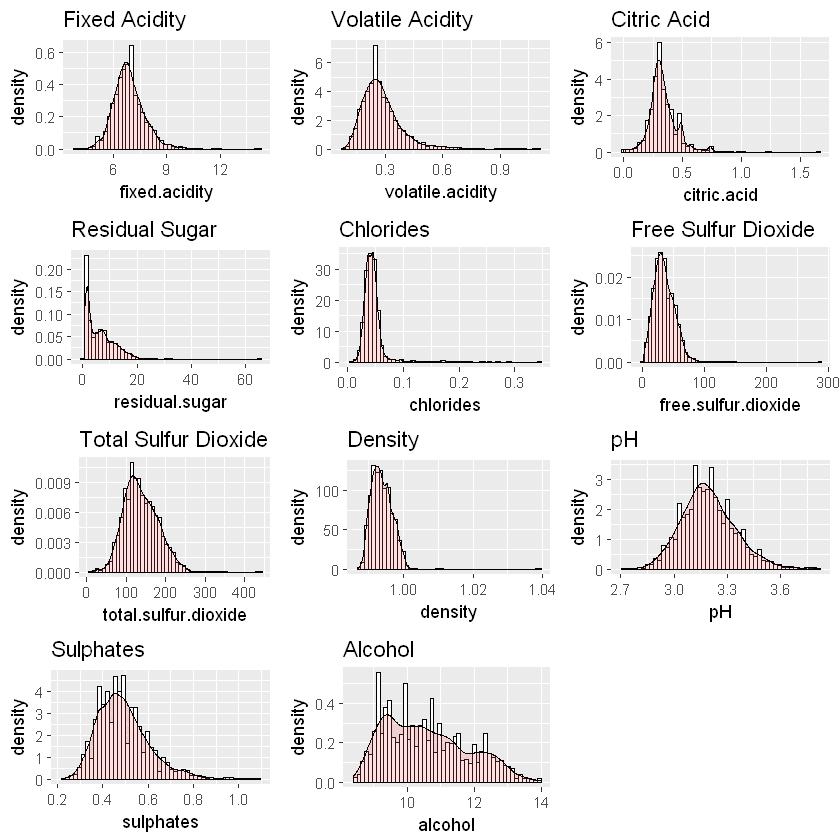

In [7]:
#histograms with density overlaid in a curve
fa <-ggplot(aes(x=fixed.acidity), data =  train) + 
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) + 
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Fixed Acidity')

va <-ggplot(aes(x=volatile.acidity), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Volatile Acidity')

ca <-ggplot(aes(x=citric.acid), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Citric Acid')

rs <-ggplot(aes(x=residual.sugar), data =  train) + 
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) + 
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Residual Sugar')

ch <-ggplot(aes(x=chlorides), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Chlorides')

fsd <-ggplot(aes(x=free.sulfur.dioxide), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Free Sulfur Dioxide')

tsd <-ggplot(aes(x=total.sulfur.dioxide), data =  train) + 
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) + 
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Total Sulfur Dioxide')

de <-ggplot(aes(x=density), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Density')

ph <-ggplot(aes(x=pH), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('pH')

su <-ggplot(aes(x=sulphates), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Sulphates')

al <-ggplot(aes(x=alcohol), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Alcohol')



#show all graphs in the grid, with 3 columns
grid.arrange(fa, va, ca, rs, ch, fsd, tsd, de, ph, su, al, ncol = 3)

Now we will have a quick look at the response variable, quality.  We can investigate the distribution of quality using a frequency plot.

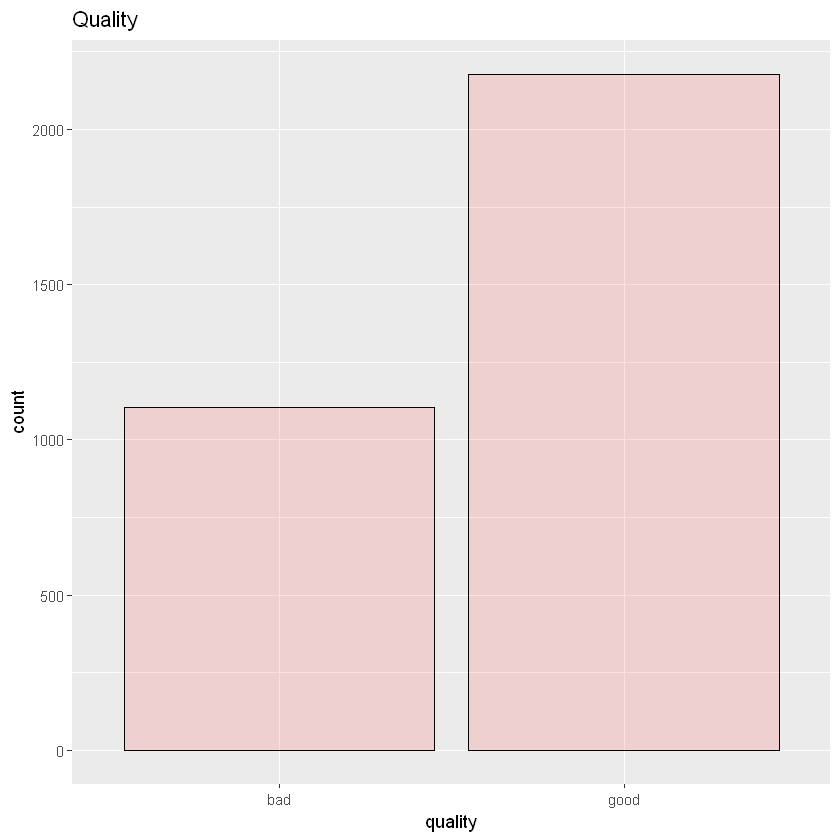

In [8]:
# generate the frequency plot for Quality
qu <-ggplot(aes(x=quality), data = train) +
    geom_bar(stat = "count", colour="black", alpha=.2, fill="#FF6666") +
    ggtitle('Quality')
qu

## Outlier detection:
As detected in the analysis of the distributions, there are definitely some outliers in the dataset.  We will look at these outliers by looking at the Cooks distance of the measurements from a general linear model with the family set to binomial.

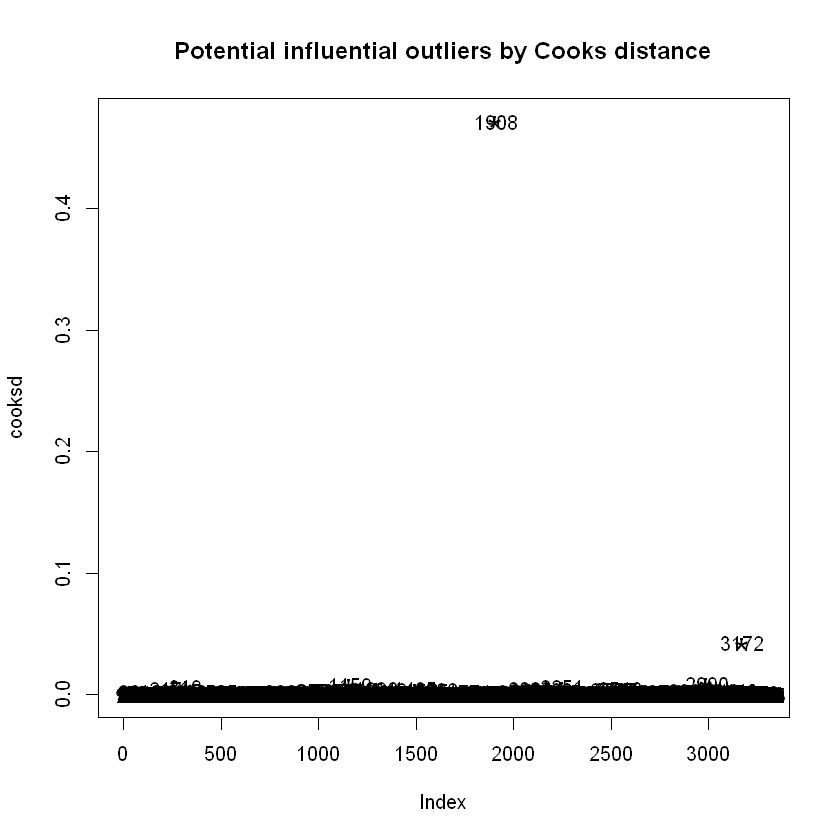

In [9]:
#code sourced from https://www.r-bloggers.com/outlier-detection-and-treatment-with-r/
mod <- glm(quality ~ ., data=train, family = "binomial" (link = "logit"))
cooksd <- cooks.distance(mod)

plot(cooksd, pch="*", cex=2, main="Potential influential outliers by Cooks distance")  # plot cook's distance
text(x=1:length(cooksd)+1, y=cooksd)  # add labels

In [10]:
infoutliers <- cooksd>0.04  # influential row numbers
(train[infoutliers, ])  # influential observations.

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1908,7.8,0.965,0.60,65.8,0.074,8,160,1.03898,3.39,0.69,11.7,good
3172,6.1,0.260,0.25,2.9,0.047,289,440,0.99314,3.44,0.64,10.5,bad


- 3172 has very high sulfur dioxide - both free (median = 33) and total (median = 133).  
- 1908 has a very high residual sugar count (median = 4.5).

Let's remove these outliers as they are likely to impact all of the models in the rest of this analyis.

In [11]:
train <- subset(train, residual.sugar != 65.8)
train <- subset(train, total.sulfur.dioxide != 440)

There may be other outliers in the data, but these will be considered once the models are created and assessed.

## Feature Engineering:

Feature engineering is when we use knowledge of the data to modify the features for input into the models.  The main thing to consider here is that winemakers usually aim to have a high concentration of free sulfur dioxide in their wines.  This means that it may be logical to convert free and total sulfur dioxide to a concentration of dioxide instead.

This will be converted by dividing free.sulfur.dioxide by total.sulfur.dioxide and multiplying by 100, so that the free sulfur dioxide is represented as a percentage of the total sulfur dioxide.

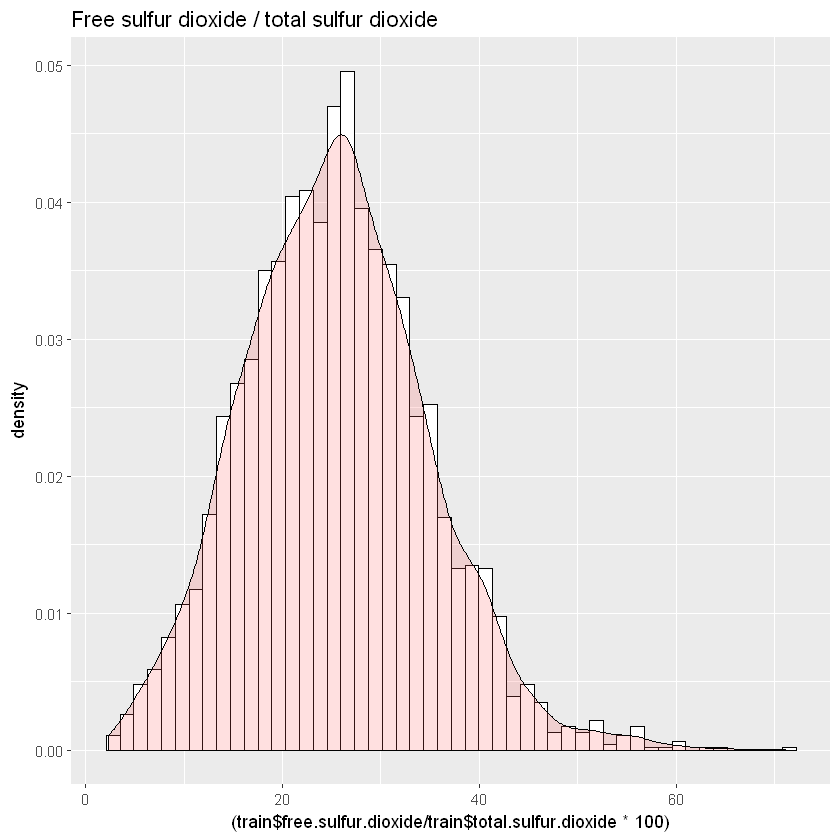

In [12]:
#Check the distribution of the new feature
sdconc <-ggplot(aes(x=(train$free.sulfur.dioxide / train$total.sulfur.dioxide * 100)), data =  train) + 
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) + 
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Free sulfur dioxide / total sulfur dioxide')
sdconc

Now we will check for correlations amongst any of the predictors.  If the predictors are highly correlated with one another, it may be worth while to combine the correlated variables as a multiplication of one another.  We can find correlations using the cor() function in R.

In [13]:
round(cor(train[,-12]),3)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.000,-0.034,0.301,0.081,0.022,-0.053,0.079,0.273,-0.434,-0.017,-0.120
volatile.acidity,-0.034,1.000,-0.162,0.071,0.080,-0.097,0.100,0.022,-0.048,-0.024,0.051
citric.acid,0.301,-0.162,1.000,0.110,0.126,0.100,0.131,0.164,-0.184,0.057,-0.079
residual.sugar,0.081,0.071,0.110,1.000,0.072,0.326,0.409,0.815,-0.183,-0.028,-0.418
chlorides,0.022,0.080,0.126,0.072,1.000,0.107,0.194,0.253,-0.089,0.017,-0.359
free.sulfur.dioxide,-0.053,-0.097,0.100,0.326,0.107,1.000,0.620,0.322,-0.015,0.033,-0.260
total.sulfur.dioxide,0.079,0.100,0.131,0.409,0.194,0.620,1.000,0.548,0.006,0.128,-0.450
density,0.273,0.022,0.164,0.815,0.253,0.322,0.548,1.000,-0.080,0.067,-0.793
pH,-0.434,-0.048,-0.184,-0.183,-0.089,-0.015,0.006,-0.080,1.000,0.134,0.093
sulphates,-0.017,-0.024,0.057,-0.028,0.017,0.033,0.128,0.067,0.134,1.000,-0.010


Other correlations that may be worth considering in our models based on the correlation is:
- the negative correlation between alcohol and density (-0.793)
- the positive correlation between density and residual sugar (0.815)

All of the rest of the correlations have a Pearson's value of < 0.6, and therefore are considered to be not very strong.

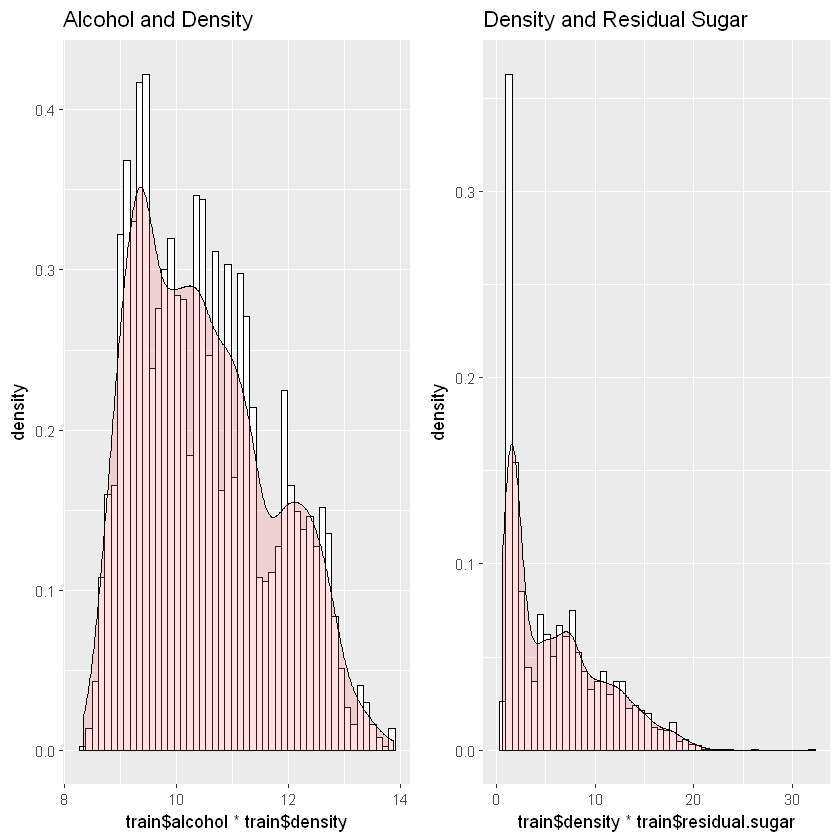

In [14]:
#check the distribution of the correlated features multiplied by one another
ad <-ggplot(aes(x=train$alcohol*train$density), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Alcohol and Density')

dl <-ggplot(aes(x=train$density*train$residual.sugar), data =  train) +
    geom_histogram(aes(y=..density..), colour="black", fill="white", bins = 50) +
    geom_density(alpha=.2, fill="#FF6666") +
    ggtitle('Density and Residual Sugar')



#show all 3 graphs in the grid, with 1 column
grid.arrange(ad, dl, ncol = 2)

Based on this analysis, these new features can be considered in the models:
- free.sulfur.dioxide / total.sulfur.dioxide * 100
- density * alcohol
- density * residual sugar

Let's add these to our dataframe

In [15]:
train$sulfconc = train$free.sulfur.dioxide/train$total.sulfur.dioxide*100
train$alcden = train$density*train$alcohol
train$den_res = train$density*train$residual.sugar

__Possible future features to be added to the model__

There are also many other features that could be considered to improve the model.  The fact that the alcohol distribution is a multi-modal, broad, non-normal distribution means that there could be other features that are not included in the data set that will explain the variances.  

Some recommendations for feature engineering that might improve any model produced include:
- Including the Red, White or Rose data for the dataset.  It is possible that the factors that improve the taste of red wine are different from the factors that improve the taste of white wine.
- Including information about the person that tasted the wine.  It is possible that personal factors such as location, background and class may influence the rating a taster gives wine.
- Including information about where the wines came from, or the climate they are grown in.
- Including information about the age of wines
- Including information about the cost per litre to produce of wine

## Stepwise Regression

First we will use a stepwise regression method of for predicting the quality of wine.  In stepwise regression, the predictor variables are chosen automatically through a process of adding predictors to the model. The process begins with a model containing no predictors, and then adds predictors one at a time, until all of the predictors are in the model.  At each step the variable that gives the greatest additional improvement to the fit is added to the model.

To implement stepwise regression for the logistic model - we will use the inbuilt step() function from base R.  The R function GLM (General Linear Model) will be used to build the model and the family will be set to Binomial - which handles the two factor good vs bad response variable.

In [16]:
#Perform cross-validation to check which model is the best
k=10 #set the number of folds to 10 
set.seed(9999) #use a seed so that random selections are reproducible
folds=sample(1:k,nrow(train),replace=TRUE) #create a column attached to the training data set that numbers the folds.

In [17]:
models <- list()

for(j in 1:k) {
    
    #set up the folds for cross validation
    data=train[folds!=j,]
    x1=train[folds==j,][,-12]
    y1=train$quality[folds==j]

    #set the starting scope to 1 variable
    wine.glmstart <- glm(quality ~ 1, data=data, family=binomial(link = 'logit'))
    
    #set the final scope to the engineered features, plus the other features included in data set
    wine.glmfinish <- glm(quality ~ ., data=data, family=binomial(link = 'logit'))
    
    #Use the stepAIC function to step from one attribute to all attributes
    wine.step <- stepAIC(wine.glmstart, scope=list(lower=wine.glmstart, upper=wine.glmfinish), direction="forward", trace = FALSE)

    #store each model in a list
    models[[j]] <- formula(wine.step)
    
    
  }

In [18]:
models

[[1]]
quality ~ alcden + volatile.acidity + sulfconc + sulphates + 
    residual.sugar + fixed.acidity + pH + alcohol + total.sulfur.dioxide + 
    free.sulfur.dioxide

[[2]]
quality ~ alcden + volatile.acidity + sulfconc + sulphates + 
    residual.sugar + fixed.acidity + alcohol + pH + den_res

[[3]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    sulphates + fixed.acidity + pH + alcohol + den_res

[[4]]
quality ~ alcden + volatile.acidity + sulfconc + sulphates + 
    residual.sugar + fixed.acidity + pH + alcohol + total.sulfur.dioxide + 
    free.sulfur.dioxide + den_res

[[5]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    sulphates + fixed.acidity + den_res + pH + alcohol + density

[[6]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    sulphates + fixed.acidity + pH + alcohol + total.sulfur.dioxide + 
    free.sulfur.dioxide + den_res

[[7]]
quality ~ alcden + volatile.acidity + sulfconc + sulphates + 
    resi

Each of these models show what stepwise selection has chosen for each fold.  It looks like our folds have returned different results.  Because we have combined total.sulfur.dioxide and free.sulfur.dioxide to turn it into a concentration, then we can remove the individual variables from the steps.  We can also remove alcohol and density as these are represented in the alcden variable.  Now the combination of residual.sugar and density is not performing well in any model, and in some of the final models it has even been removed.  This means that we can remove this as a factor, and retain residual.sugar as a factor which is used by all models.  

To remove these features from consideration, we will adjust wine.glmfinish to only consider:
- alcden 
- sulfconc
- residual.sugar
- fixed.acidity
- volatile.acidity
- citric.acid
- chlorides
- pH
- sulphate

Please note that all features from the original dataset are still included, just some features have been engineered.
These changes should improve our cross validation results on the stepwise regression.

In [19]:
models <- list()

for(j in 1:k) {
    
    #set up the folds for cross validation
    data=train[folds!=j,]
    x1=train[folds==j,][,-12]
    y1=train$quality[folds==j]

    #set the starting scope to 1 variable
    wine.glmstart <- glm(quality ~ 1, data=data, family=binomial(link = 'logit'))
    
    #set the final scope to the engineered features, plus the other features included in data set
    wine.glmfinish <- glm(quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+
                          citric.acid+chlorides+pH, data=data, family=binomial(link = 'logit'))
    
    #Use the stepAIC function to step from one attribute to all attributes
    wine.step <- stepAIC(wine.glmstart, scope=list(lower=wine.glmstart, upper=wine.glmfinish), direction="forward", trace = FALSE)

    #store each model in a list
    models[[j]] <- formula(wine.step)    
    
  }

In [20]:
models

[[1]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    fixed.acidity + pH

[[2]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    fixed.acidity + pH

[[3]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    pH + fixed.acidity

[[4]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    pH + fixed.acidity

[[5]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    pH + fixed.acidity

[[6]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    pH + fixed.acidity

[[7]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    fixed.acidity + pH

[[8]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    pH + fixed.acidity

[[9]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    fixed.acidity + pH

[[10]]
quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    fixed.acidity + pH


Now our cross-validated stepwise selection of variables is choosing the same variables for each as the final model (even though some of them are returning them in a slightly different priority order)!

The final variables chosen by the stepwise regression are:
- combination of alchol and density
- volatile.acidity
- sulfconc
- residual.sugar
- fixed.acidity
- pH

Now we can check how this model performs by running a cross-validation against the training data.

In [21]:
probabilities <- list()
actuals <- list()
preds <- list()
accuracy <- vector()
precision <- vector()
recall <- vector()
fmeasure <- vector()
intercept <- vector()
alcden <- vector()
volatile.acidity <- vector()
sulfconc <- vector()
residual.sugar <- vector()
fixed.acidity <- vector()
pH <- vector()

k = 10

for(j in 1:k) {
    
    #set up the folds for cross validation
    data=train[folds!=j,]
    x1=train[folds==j,][,-12]
    y1=train$quality[folds==j]
    
    #Use the stepAIC function to step from one attribute to all attributes
    wine.stepfinal <- glm(quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
                          fixed.acidity + pH, 
                          data=data, family=binomial(link = 'logit'))

    #store the model attributes for each model
    probabilities[[j]] <- predict(wine.stepfinal, x1, type = "response")
    actuals[[j]] <- y1
    preds[[j]] = ifelse(predict(wine.stepfinal, x1, type = "response") <0.5, "bad", "good")
    
    cm <- confusionMatrix(preds[[j]], actuals[[j]])
    table <- cm$table

    accuracy[j] <- confusionMatrix(preds[[j]], actuals[[j]])$overall['Accuracy']
    precision[j] <- table[2, 2] / sum(table[2,])
    recall[j] <- table[2, 2] / sum(table[,2]) 
    fmeasure[j] <- 2 * precision[[j]] * recall[[j]] / (precision[[j]] + recall[[j]]) #f-measure
    
    intercept[j] <- as.numeric(wine.stepfinal$coefficients[1])
    alcden[j] <- as.numeric(wine.stepfinal$coefficients[2])
    volatile.acidity[j] <- as.numeric(wine.stepfinal$coefficients[3])
    sulfconc[j] <- as.numeric(wine.stepfinal$coefficients[4])
    residual.sugar[j] <- as.numeric(wine.stepfinal$coefficients[5])
    fixed.acidity[j] <- as.numeric(wine.stepfinal$coefficients[6])
    pH[j] <- as.numeric(wine.stepfinal$coefficients[7])
    
    
  }


In [22]:
#display the coefficients of each fold
stepcoeff <- data.frame(cbind("folds" = 1:10, intercept, alcden, volatile.acidity,
                               sulfconc, residual.sugar, fixed.acidity))
stepcoeff

folds,intercept,alcden,volatile.acidity,sulfconc,residual.sugar,fixed.acidity
1,-11.30568,1.081768,-6.230952,0.03099512,0.04501107,-0.1558337
2,-11.29605,1.083162,-6.262449,0.03039384,0.05259166,-0.1610565
3,-11.31502,1.094978,-6.537516,0.02756385,0.05583502,-0.1277988
4,-11.69462,1.078140,-6.331776,0.02606417,0.05276946,-0.1597652
5,-11.83104,1.073069,-6.294786,0.02866684,0.05511569,-0.1455473
6,-12.05365,1.102283,-6.224737,0.03538237,0.05667550,-0.1364075
7,-11.13394,1.119597,-6.551033,0.02742272,0.05491488,-0.1641403
8,-11.72608,1.087701,-6.620432,0.02898838,0.04991816,-0.1505059
9,-10.49097,1.091856,-6.465293,0.02620860,0.05205994,-0.1731661
10,-11.26378,1.067261,-6.379663,0.02966102,0.05059529,-0.1521226


In [23]:
#create a model-comparison table using accuracy, precision, recall and fmeasure
stepresults <- data.frame(cbind("folds" = 1:10, precision, recall, accuracy, fmeasure))
stepresults

folds,precision,recall,accuracy,fmeasure
1,0.8008850,0.8743961,0.7738854,0.8360277
2,0.8117647,0.8922414,0.7852941,0.8501027
3,0.7806691,0.9130435,0.7723343,0.8416834
4,0.7848101,0.9029126,0.7694805,0.8397291
5,0.8461538,0.8311111,0.7777778,0.8385650
6,0.7868852,0.8533333,0.7368421,0.8187633
7,0.7500000,0.8155340,0.7210682,0.7813953
8,0.8051948,0.8493151,0.7600000,0.8266667
9,0.8207171,0.9115044,0.8030303,0.8637317
10,0.7448560,0.9004975,0.7537538,0.8153153


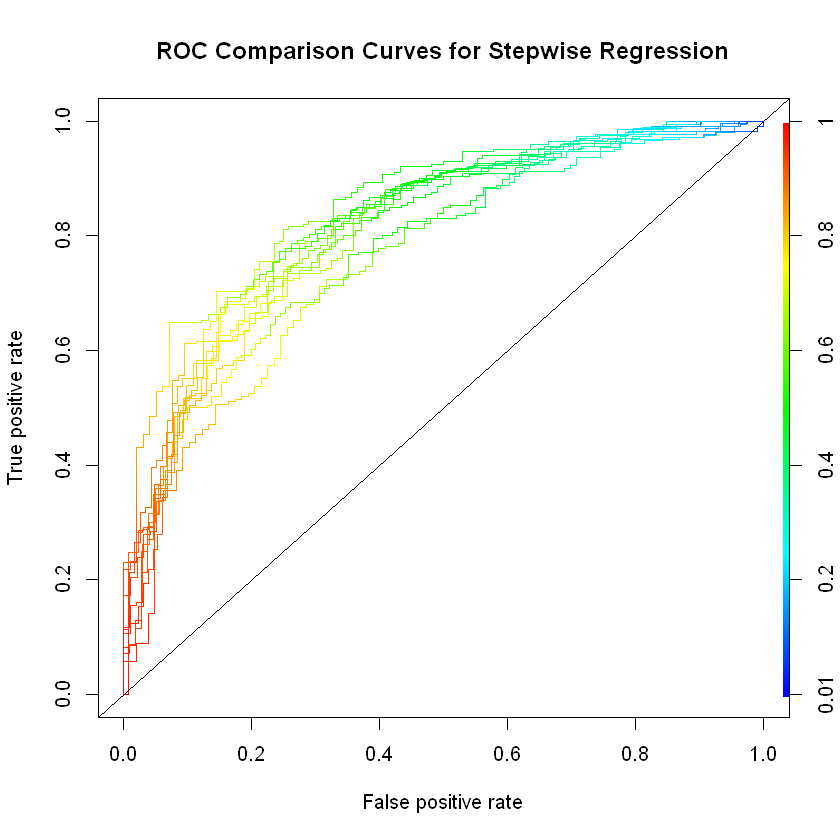

In [24]:
#Create the ROC curve to demonstrate true prediction rate vs false prediction rate for the stepwise regression models
ROCsteppred = prediction(probabilities, actuals)
ROCstepperf = performance(ROCsteppred, measure = "tpr", x.measure = "fpr")

plot(ROCstepperf, main="ROC Comparison Curves for Stepwise Regression", colorize=TRUE)
abline(a=0, b=1)

In [25]:
ROCstepperf = performance(ROCsteppred, measure = "auc")
mean(as.numeric(ROCstepperf@y.values))

[1] 0.8115385

__Final Stepwise Regression Model__

Because we used k-fold cross-validation, the performance of the stepwise final model needs to be represented as a mean of the cross-validation, with a confidence interval using a t-test.

In [26]:
lapply(stepresults[,-1], function(x) t.test(x))

$precision

	One Sample t-test

data:  x
t = 81.24, df = 9, p-value = 0.00000000000003285
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.7711067 0.8152805
sample estimates:
mean of x 
0.7931936 


$recall

	One Sample t-test

data:  x
t = 78.753, df = 9, p-value = 0.00000000000004344
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.8492725 0.8995053
sample estimates:
mean of x 
0.8743889 


$accuracy

	One Sample t-test

data:  x
t = 102.2, df = 9, p-value = 0.000000000000004172
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.7484058 0.7822875
sample estimates:
mean of x 
0.7653466 


$fmeasure

	One Sample t-test

data:  x
t = 116.47, df = 9, p-value = 0.000000000000001288
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.8150538 0.8473423
sample estimates:
mean of x 
 0.831198 



Our final model as chosen by stepwise regression can be represented as follows:

final.step = quality ~ alcden + volatile.acidity + sulfconc + residual.sugar + 
    fixed.acidity + pH

Where alcden is the combined alcohol and density values and sulfconc is the ratio of free sulfur dioxide to total sulfur dioxide.

This model showed the following measures in cross validation against the training data only:
- Accuracy: 76.5% (74.8% to 78.2% confidence interval)
- Recall: 87.4% (84.9% to 90.0% confidence interval)
- Precision: 79.3% (77.1% to 81.5% confidence interval)
- F-measure: 83.1% (81.5% to 84.7% confidence interval)

The ROC curves for the cross-validation gave an average AUC (Area under curve) of 81.2%


## Ridge Regression

Now we will look at ridge regression as a method of choosing variables for our logistic regression.  Ridge regression involves tuning a parameter called lambda.  Ridge regression is a shrinkage method, which aims to constrain or regularise the coefficient estimate.  It aims to shrink the coefficients to zero.  Shrinking a coefficient estimate can reduce the variance of a model.

We will use the glmnet package in R to calculate both the ridge and lasso regressions.  GLMNET requires a vector input and a matrix of predictors.  You also must specify alpha for GLMNET.  Alpha is set to zero for ridge regression and 1 for lasso regression.

In all cases, we will use the same starting parameters as used in the full set of the stepwise regression.  This includes the engineered features alcohol+density and sulfur concentrate.  It removes the original features density, alchol, total sulfur dioxide and free sulfur dioxide.

Unlike the stepwise regression function, the GLMNET package automatically performs k-fold cross validation on its lambda variable to ensure that the best lambda is selected.

In [27]:
#set the matrix for glmnet
x=model.matrix(quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH
               ,train)[,-1]
#convert the response variable into a vector
y=train$quality

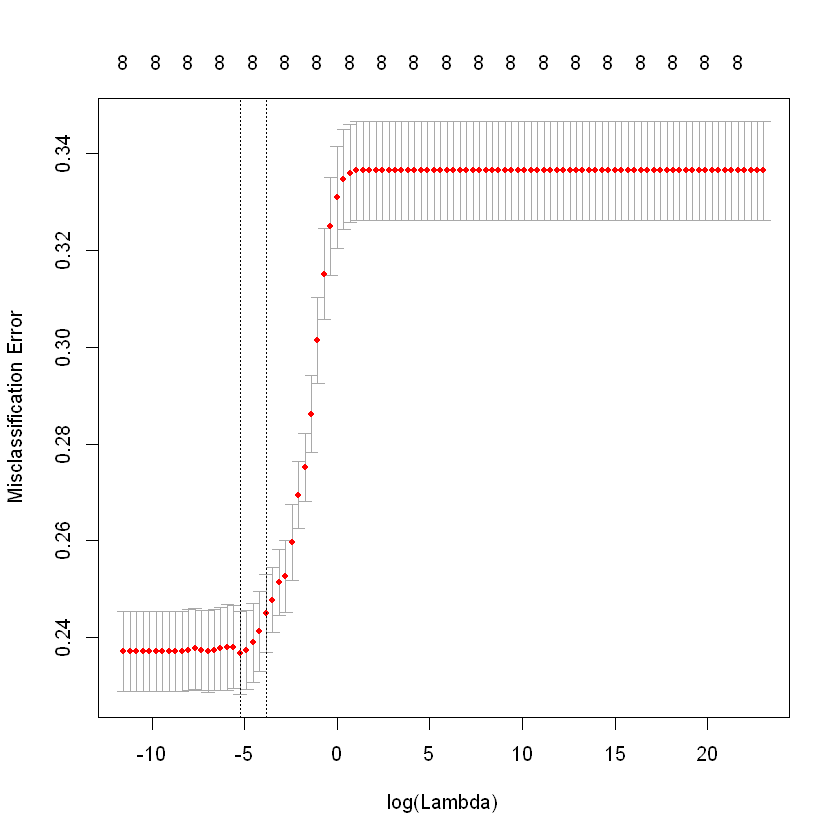

In [28]:
#Using cross validation to get the best lambda
grid=10^seq(10,-5,length=100) #range chosen to cover the null model containing only the intercept, to the least squares fit.
cvfit = cv.glmnet(x, y, family = "binomial", type.measure = "class", alpha = 0, lambda = grid)
plot(cvfit)

The plot has identified two lambdas with a log(lambda) of between -13 and -2.  The lower lambda value correlates to the lambda that gives the minmium misclassification error, and the higher value provides the most regularised lambda value.  The upper lambda value is those that are within 1 standard error of the minimum.  Acknowledging that there may be error in the lambda cross validation process, I have chosen the 1se value to be on the side of caution.  (Friedman, Hastie and Tibshirani (2010)).

In [29]:
#set lambda to the 1 standard error identified by cross validation.
ridgelambda = cvfit$lambda.1se
ridgelambda

[1] 0.02154435

In [30]:
#create lists to hold objects
probabilities <- list()
actuals <- list()
preds <- list()

#create vectors to hold numbers for model metrics
accuracy <- vector()
precision <- vector()
recall <- vector()
fmeasure <- vector()

#create vectors to hold the coefficients
intercept <- vector()
alcden <- vector()
sulfconc <- vector()
residual.sugar <- vector()
fixed.acidity <- vector()
volatile.acidity <- vector()
citric.acid <- vector()
chlorides <- vector()
pH <- vector()

#set the cross-validation number to 10
k = 10

#loop through the cross-validation
for(j in 1:k){
    
    #set the data for each fold
    x1 = model.matrix((quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH),
                      train[folds==j,])[,-1]
    x2 = model.matrix((quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH),
                      train[folds!=j,])[,-1]
    y1 = train$quality[folds == j]
    y2 = train$quality[folds != j]

    #set the model
    wine.ridge = glmnet(x2, y2, family = "binomial", alpha = 0, lambda = ridgelambda)
    

    #store the objects for creating the confusion matrix
    probabilities[[j]] <- predict(wine.ridge, x1, type = "response")
    actuals[[j]] <- y1
    preds[[j]] = ifelse(predict(wine.ridge, x1, type = "response") <0.5, "bad", "good")
    
    cm <- confusionMatrix(preds[[j]], actuals[[j]])
    table <- cm$table
    
    #store the measurement values from the confusion matrix
    accuracy[j] <- confusionMatrix(preds[[j]], actuals[[j]])$overall['Accuracy']
    precision[j] <- table[2, 2] / sum(table[2,])
    recall[j] <- table[2, 2] / sum(table[,2]) 
    fmeasure[j] <- 2 * precision[[j]] * recall[[j]] / (precision[[j]] + recall[[j]]) #f-measure
    
    #store the coefficients of the model for each iteration through the cross validation
    intercept[j] <- as.numeric(coef(wine.ridge)[1])
    alcden[j] <- as.numeric(coef(wine.ridge)[2])
    sulfconc[j] <- as.numeric(coef(wine.ridge)[3])
    residual.sugar[j] <- as.numeric(coef(wine.ridge)[4])
    fixed.acidity[j] <- as.numeric(coef(wine.ridge)[5])
    volatile.acidity[j] <- as.numeric(coef(wine.ridge)[6])
    citric.acid[j] <- as.numeric(coef(wine.ridge)[7])
    chlorides[j] <- as.numeric(coef(wine.ridge)[8])
    pH[j] <- as.numeric(coef(wine.ridge)[9])
    
    
  }

In [31]:
#display the coefficients of each fold
ridgecoeff <- data.frame(cbind("folds" = 1:10, intercept, alcden, sulfconc,
                               residual.sugar, fixed.acidity, volatile.acidity,
                              citric.acid, chlorides, pH))
ridgecoeff

folds,intercept,alcden,sulfconc,residual.sugar,fixed.acidity,volatile.acidity,citric.acid,chlorides,pH
1,-8.785970,0.8360019,0.02906768,0.02070503,-0.1445812,-4.913142,0.3209501,-3.523068,0.7585930
2,-8.629237,0.8281201,0.02880449,0.02647030,-0.1589530,-4.893907,0.5668547,-4.861962,0.7478953
3,-8.691503,0.8397936,0.02629306,0.02921656,-0.1197184,-5.159747,0.3593836,-4.080600,0.6974304
4,-9.095680,0.8324728,0.02521037,0.02670425,-0.1572247,-4.987720,0.4909259,-3.963779,0.9098970
5,-8.974995,0.8213741,0.02724156,0.02884470,-0.1409638,-4.966660,0.3471147,-5.288291,0.8745735
6,-9.136906,0.8445738,0.03269261,0.03023480,-0.1330481,-4.924916,0.2790299,-4.237391,0.7824488
7,-8.523776,0.8591483,0.02616280,0.02849175,-0.1511514,-5.148657,0.3022898,-3.501545,0.6493911
8,-9.061619,0.8385725,0.02739994,0.02504083,-0.1422557,-5.215084,0.3861085,-3.707256,0.8588129
9,-7.985129,0.8338201,0.02541625,0.02547428,-0.1682792,-5.052010,0.5535498,-4.701876,0.5888852
10,-8.645649,0.8216907,0.02808043,0.02549958,-0.1451336,-5.068691,0.3943528,-4.039165,0.7854226


The final variables chosen by Ridge regression include all variables that the model was given.  No improvements were made to the complexity of the model, so the final variables used are:
- alcden
- sulfconc
- residual.sugar
- fixed.acidity
- volatile.acidity
- citric.acid
- chlorides
- pH


In [32]:
#create a model-comparison table using accuracy, precision, recall and fmeasure
ridgeresults <- data.frame(cbind("folds" = 1:10, precision, recall, accuracy, fmeasure))
ridgeresults

folds,precision,recall,accuracy,fmeasure
1,0.8000000,0.8888889,0.7802548,0.8421053
2,0.7886792,0.9008621,0.7676471,0.8410463
3,0.7720588,0.9130435,0.7636888,0.8366534
4,0.7560976,0.9029126,0.7402597,0.8230088
5,0.8362832,0.8400000,0.7746914,0.8381375
6,0.7845528,0.8577778,0.7368421,0.8195329
7,0.7238494,0.8398058,0.7062315,0.7775281
8,0.7901235,0.8767123,0.7600000,0.8311688
9,0.8054475,0.9159292,0.7909091,0.8571429
10,0.7176471,0.9104478,0.7297297,0.8026316


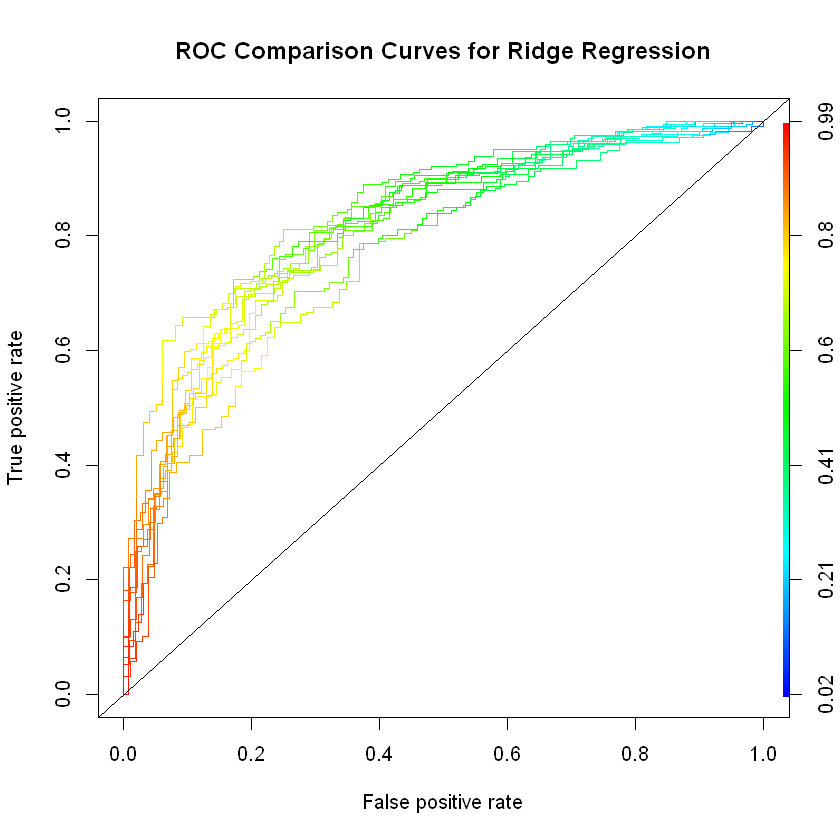

In [33]:
#Create the ROC curve to demonstrate true prediction rate vs false prediction rate for the cross validated Ridge Regression models
ROCridgepred = prediction(probabilities, actuals)
ROCridgeperf = performance(ROCridgepred, measure = "tpr", x.measure = "fpr")

plot(ROCridgeperf, main="ROC Comparison Curves for Ridge Regression", colorize=TRUE)
abline(a=0, b=1) #add a trend line

In [34]:
ROCridgeperf = performance(ROCsteppred, measure = "auc")
mean(as.numeric(ROCridgeperf@y.values))

[1] 0.8115385

__Final Ridge Regression Model__

We can now look at the predicting power of our ridge regression model using a t-test.

In [35]:
lapply(ridgeresults[,-1], function(x) t.test(x))

$precision

	One Sample t-test

data:  x
t = 67.26, df = 9, p-value = 0.0000000000001793
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.7513253 0.8036225
sample estimates:
mean of x 
0.7774739 


$recall

	One Sample t-test

data:  x
t = 94.697, df = 9, p-value = 0.000000000000008281
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.8635055 0.9057705
sample estimates:
mean of x 
 0.884638 


$accuracy

	One Sample t-test

data:  x
t = 91.416, df = 9, p-value = 0.00000000000001137
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.7363416 0.7737092
sample estimates:
mean of x 
0.7550254 


$fmeasure

	One Sample t-test

data:  x
t = 114.65, df = 9, p-value = 0.000000000000001483
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.8105802 0.8432109
sample estimates:
mean of x 
0.8268956 



Our final model as chosen by ridge regression uses all of the coefficients in the model (after feature engineering):

quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH

And it uses a lambda value of ~ 0.02 (2dp).  

Alcden continues to represent the combined alcohol and density values and sulfconc is the ratio of free sulfur dioxide to total sulfur dioxide.

The model showed the following performance measures in cross validation against the training data only:
- Accuracy: 75.5% (73.6% to 77.4% confidence interval)
- Recall: 88.5% (86.4% to 90.6% confidence interval)
- Precision: 77.75% (75.1% to 80.4% confidence interval)
- Fmeasure: 82.7% (81.1% to 84.3% confidence interval)

The ROC curves for the cross-validation gave an average AUC (Area under curve) of 81.2%

## Lasso Regression

Lasso regression is also calculated in R with the GLMNET package.  We will repeat the process above but using alpha - 1, to let the GLMNET package know that it is to use the lasso regression.

In [ ]:
#set the matrix for glmnet
x=model.matrix(quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH
               ,train)[,-1]
#convert the response variable into a vector
y=train$quality

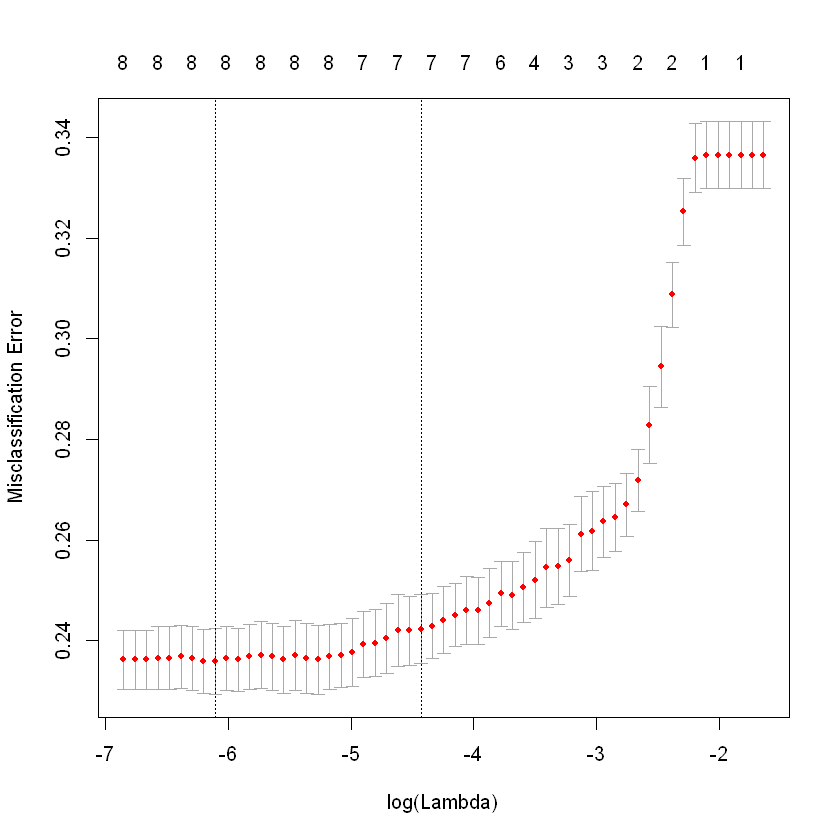

In [39]:
#Using cross validation to get the best lambda
grid = 10^seq(10,-2,length=100)
cvfit = cv.glmnet(x, y, family = "binomial", type.measure = "class", alpha = 1, nlambda=100)
plot(cvfit)

In [40]:
#again we will set lambda to 1 standard error above the minimum, as explained previously
lassolambda <- cvfit$lambda.1se
lassolambda

[1] 0.01191402

In [41]:
#create lists to hold objects
probabilities <- list()
actuals <- list()
preds <- list()

#create vectors to hold numbers for model metrics
accuracy <- vector()
precision <- vector()
recall <- vector()
fmeasure <- vector()

#create vectors to hold the coefficients
intercept <- vector()
alcden <- vector()
sulfconc <- vector()
residual.sugar <- vector()
fixed.acidity <- vector()
volatile.acidity <- vector()
citric.acid <- vector()
chlorides <- vector()
pH <- vector()

#set the cross-validation number to 10
k = 10

#loop through the cross-validation
for(j in 1:k){
    
    #set the data for each fold
    x1 = model.matrix((quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH),
                      train[folds==j,])[,-1]
    x2 = model.matrix((quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH),
                      train[folds!=j,])[,-1]
    y1 = train$quality[folds == j]
    y2 = train$quality[folds != j]

    #set the model
    wine.lasso = glmnet(x2, y2, family = "binomial", alpha = 1, lambda = lassolambda)

    #store the objects for creating the confusion matrix
    probabilities[[j]] <- predict(wine.lasso, x1, type = "response")
    actuals[[j]] <- y1
    preds[[j]] = ifelse(predict(wine.lasso, x1, type = "response") <0.5, "bad", "good")
    
    cm <- confusionMatrix(preds[[j]], actuals[[j]])
    table <- cm$table
    
    #store the measurement values from the confusion matrix
    accuracy[j] <- confusionMatrix(preds[[j]], actuals[[j]])$overall['Accuracy']
    precision[j] <- table[2, 2] / sum(table[2,])
    recall[j] <- table[2, 2] / sum(table[,2]) 
    fmeasure[j] <- 2 * precision[[j]] * recall[[j]] / (precision[[j]] + recall[[j]]) #f-measure
    
    #store the coefficients of the model for each iteration through the cross validation
    intercept[j] <- as.numeric(coef(wine.lasso)[1])
    alcden[j] <- as.numeric(coef(wine.lasso)[2])
    sulfconc[j] <- as.numeric(coef(wine.lasso)[3])
    residual.sugar[j] <- as.numeric(coef(wine.lasso)[4])
    fixed.acidity[j] <- as.numeric(coef(wine.lasso)[5])
    volatile.acidity[j] <- as.numeric(coef(wine.lasso)[6])
    citric.acid[j] <- as.numeric(coef(wine.lasso)[7])
    chlorides[j] <- as.numeric(coef(wine.lasso)[8])
    pH[j] <- as.numeric(coef(wine.lasso)[9])
    }

In [42]:
#display the coefficients of each fold
lassocoeff <- data.frame(cbind("folds" = 1:10, intercept, alcden, sulfconc,
                               residual.sugar, fixed.acidity, volatile.acidity,
                              citric.acid, chlorides, pH))
lassocoeff

folds,intercept,alcden,sulfconc,residual.sugar,fixed.acidity,volatile.acidity,citric.acid,chlorides,pH
1,-8.779664,0.9172427,0.02580654,0.01633921,-0.09301512,-5.101515,0,0.00000000,0.4170566
2,-8.553642,0.9095637,0.02531757,0.02306164,-0.09996637,-5.117130,0,-1.08177817,0.3928269
3,-8.721891,0.9272725,0.02240811,0.02617407,-0.06588012,-5.394307,0,-0.22180318,0.3487465
4,-9.089743,0.9157652,0.02129844,0.02401469,-0.10058415,-5.204501,0,-0.22245146,0.5694414
5,-9.001919,0.8983083,0.02365347,0.02512616,-0.08765772,-5.137317,0,-1.56654939,0.5529323
6,-9.281812,0.9311744,0.02966912,0.02690877,-0.07980084,-5.086883,0,-0.65333142,0.4560408
7,-8.572844,0.9506698,0.02223334,0.02559904,-0.10122389,-5.367071,0,0.00000000,0.2996486
8,-9.087937,0.9219633,0.02362938,0.02125047,-0.08804421,-5.467927,0,-0.01305913,0.5278756
9,-7.784105,0.9182348,0.02138886,0.02246420,-0.11388767,-5.315190,0,-0.90450169,0.2006712
10,-8.606020,0.9012099,0.02433735,0.02137464,-0.09092966,-5.266930,0,-0.39150588,0.4433533


An interesting thing to point out in the coefficient table is that lasso regression has zerod out the citric.acid coefficient in all models, and in some models it has zerod out the chlorides.  This is different from the ridge regression which kept all of the coefficients in.  The final variables chosen by lasso regression are:
- alcden
- sulfconc
- residual.sugar
- fixed.acidity
- volatile.acidity
- chlorides
- pH

In [43]:
#create a model-comparison table using accuracy, precision, recall and fmeasure
lassoresults <- data.frame(cbind("folds" = 1:10, precision, recall, accuracy, fmeasure))
lassoresults

folds,precision,recall,accuracy,fmeasure
1,0.7913043,0.8792271,0.7675159,0.8329519
2,0.7953668,0.8879310,0.7676471,0.8391039
3,0.7644928,0.9173913,0.7579251,0.8339921
4,0.7717842,0.9029126,0.7564935,0.8322148
5,0.8423423,0.8311111,0.7746914,0.8366890
6,0.7909836,0.8577778,0.7430341,0.8230277
7,0.7379913,0.8203883,0.7121662,0.7770115
8,0.7875000,0.8630137,0.7507692,0.8235294
9,0.8093385,0.9203540,0.7969697,0.8612836
10,0.7298387,0.9004975,0.7387387,0.8062361


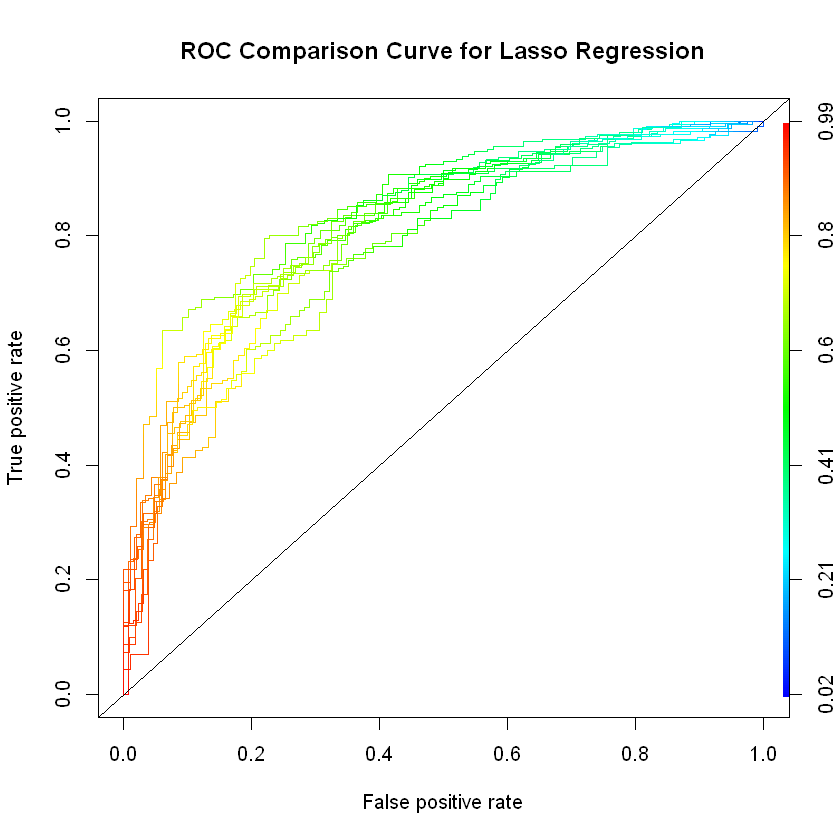

In [47]:
#Create the ROC curve to demonstrate true prediction rate vs false prediction rate for the cross validated Ridge Regression models
ROClassopred = prediction(probabilities, actuals)
ROClassoperf = performance(ROClassopred, measure = "tpr", x.measure = "fpr")

plot(ROClassoperf, main="ROC Comparison Curve for Lasso Regression", colorize=TRUE)
abline(a=0, b=1)

In [48]:
ROClassoperf = performance(ROClassopred, measure = "auc")
mean(as.numeric(ROClassoperf@y.values))

[1] 0.809407

__Final Lasso Regression Model__

We can use an average of the performance of the model over the k-fold cross validation to estimate performance of the final model using a t-test.

In [49]:
lapply(lassoresults[,-1], function(x) t.test(x))

$precision

	One Sample t-test

data:  x
t = 74.823, df = 9, p-value = 0.00000000000006882
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.7584488 0.8057397
sample estimates:
mean of x 
0.7820943 


$recall

	One Sample t-test

data:  x
t = 80.441, df = 9, p-value = 0.0000000000000359
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.8533676 0.9027533
sample estimates:
mean of x 
0.8780604 


$accuracy

	One Sample t-test

data:  x
t = 104.57, df = 9, p-value = 0.000000000000003394
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.7402278 0.7729624
sample estimates:
mean of x 
0.7565951 


$fmeasure

	One Sample t-test

data:  x
t = 117.11, df = 9, p-value = 0.000000000000001225
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.8106375 0.8425705
sample estimates:
mean of x 
 0.826604 



Our final model as chosen by lasso regression can be represented as follows:
final.lasso = quality ~ alcden + fixed.acidity + volatile.acidity + sulfconc + residual.sugar + chlorides + pH

Where alcden is the combined alcohol and density values and sulfconc is the ratio of free sulfur dioxide to total sulfur dioxide.

This model showed the following performance measures in cross validation against the training data only:

Accuracy: 75.6% (74.0% to 77.3% confidence interval)
Precision: 78.2% (75.8% to 80.6% confidence interval)
Recall: 87.8% (85.3% to 90.3% confidence interval)
Fmeasure: 83.7% (81.1% to 84.3% confidence interval)

The ROC curves for the cross-validation gave an average AUC (Area under curve) of 80.1%

## Final Model Comparison

Now we can test our 3 models using the test data to see which one is best!  First step is to add our engineered features to the test data.  We will be testing the following three models:
- wine.stepfinal
- wine.ridge
- wine.lasso

We will train the models using the full training set, and then use the trained models to predict the test set.

In [59]:
#add the engineered data features to the test set
test$sulfconc = test$free.sulfur.dioxide/test$total.sulfur.dioxide*100
test$alcden = test$density*test$alcohol

#restrict the testing data set to the features chosen during model development
trainx = model.matrix(quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH
               ,train)[,-1]

testx = model.matrix(quality ~ alcden+sulfconc+residual.sugar+fixed.acidity+volatile.acidity+citric.acid+chlorides+pH
               ,test)[,-1]


In [60]:
#train our models using the full training set
wine.stepfinal <- glm(quality ~ alcden+volatile.acidity+sulfconc+residual.sugar+fixed.acidity+pH, 
                      data=train, family=binomial(link = 'logit'))

wine.ridge <- glmnet(trainx, train$quality, family = "binomial", alpha = 0, lambda = ridgelambda)

wine.lasso <- glmnet(trainx, train$quality, family = "binomial", alpha = 1, lambda = lassolambda)

In [52]:
#use our models to predict the wine quality for the testing data set
stepwisepreds <- as.vector(ifelse(predict(wine.stepfinal, test[,-12], type = "response") < 0.5, "bad", "good"))
stepwiseprobs <- as.vector(predict(wine.stepfinal, test[,-12], type = "response"))

ridgepreds <- as.vector(ifelse(predict(wine.ridge, testx, type = "response")  <0.5, "bad", "good"))
ridgeprobs <- as.vector(predict(wine.ridge, testx, type = "response"))

lassopreds <- as.vector(ifelse(predict(wine.lasso, testx, type = "response")  <0.5, "bad", "good"))
lassoprobs <- as.vector(predict(wine.lasso, testx, type = "response"))

predslist <- list(stepwisepreds,ridgepreds,lassopreds)
probslist <- list(stepwiseprobs, ridgeprobs, lassoprobs)

In [53]:
#compare their coefficients
coef(wine.stepfinal)

(Intercept)           alcden volatile.acidity         sulfconc 
    -11.40455313       1.08753846      -6.38783360       0.02911045 
  residual.sugar    fixed.acidity               pH 
      0.05252002      -0.15269945       0.84333334

In [54]:
coef(wine.ridge)

9 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)      -8.75197229
alcden            0.83545521
sulfconc          0.02761693
residual.sugar    0.02666384
fixed.acidity    -0.14620841
volatile.acidity -5.03205250
citric.acid       0.40008226
chlorides        -4.17440547
pH                0.76524293

In [55]:
coef(wine.lasso)

9 x 1 sparse Matrix of class "dgCMatrix"
                          s0
(Intercept)      -8.75473216
alcden            0.91935857
sulfconc          0.02394058
residual.sugar    0.02327022
fixed.acidity    -0.09211202
volatile.acidity -5.24600924
citric.acid       .         
chlorides        -0.44133062
pH                0.42144860

In [56]:
#build a model comparison table
accuracy <- vector()
precision <- vector()
recall <- vector()
fmeasure <- vector()
actuals <- list()

#loop through the models and collect the model performance measures
for (j in 1:3){
    cm <- confusionMatrix(predslist[[j]],test$quality)
    actuals[[j]] <- test$quality
    accuracy[j] <- cm$overall['Accuracy']
    precision[j] <- cm$table[2, 2] / sum(cm$table[2,])
    recall[j] <- cm$table[2, 2] / sum(cm$table[,2]) 
    fmeasure[j] <- 2 * precision[[j]] * recall[[j]] / (precision[[j]] + recall[[j]]) #f-measure
    }
    
#create a data frame summarising the model performance measures
overallresults <- data.frame(cbind(c('stepwise','ridge','lasso'), precision, recall, accuracy, fmeasure))
overallresults


V1,precision,recall,accuracy,fmeasure
stepwise,0.732673267326733,0.850574712643678,0.705014749262537,0.787234042553191
ridge,0.71939736346516,0.87816091954023,0.702064896755162,0.790890269151139
lasso,0.726053639846743,0.871264367816092,0.706489675516224,0.792058516196447


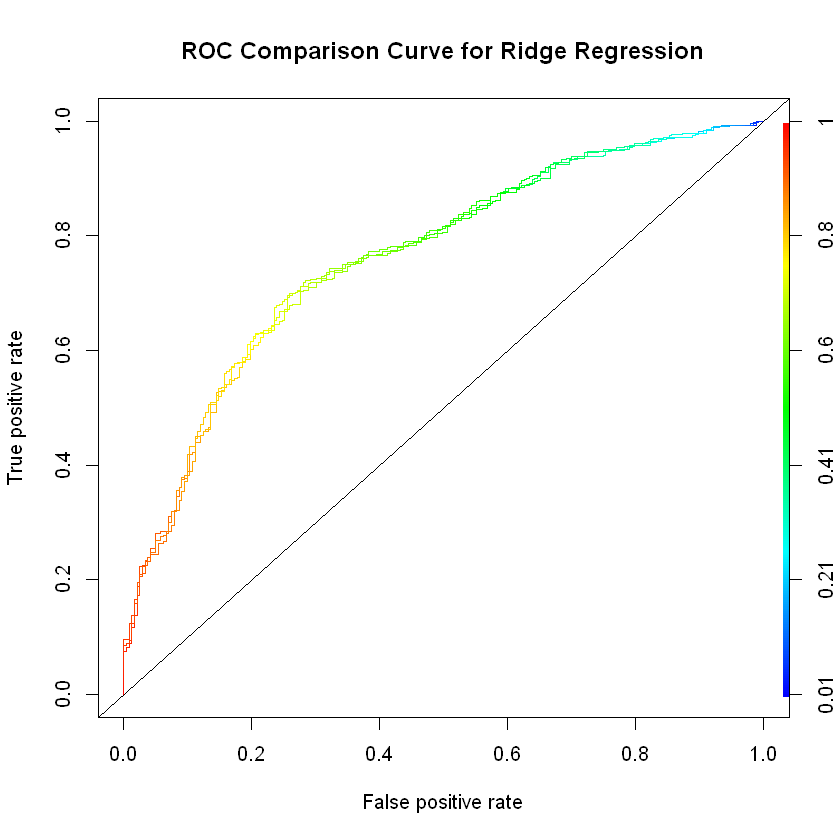

In [57]:
#Create the ROC curves for the final model performance measures
manypred = prediction(probslist, actuals)
many.roc.perf = performance(manypred, measure = "tpr", x.measure = "fpr")

plot(many.roc.perf, main="ROC Comparison Curve for All Models", colorize=TRUE)
abline(a=0, b=1)

In [58]:
#Calculate the final AUC
manypauc.perf = performance(manypred, measure = "auc")
manypauc.perf@y.values

[[1]]
[1] 0.7625467

[[2]]
[1] 0.7637955

[[3]]
[1] 0.7620453

When comparing the final three models using the test data, the accuracy of the models from the training set decreased slightly and the area under the curve also decreased.  This could be due to outliers in the test data.  Let's have a quick look at the cooks distance of the test data to see if outliers is causing the decrease in performance.  We will use the stepwise regression model to check the cooks.distance.

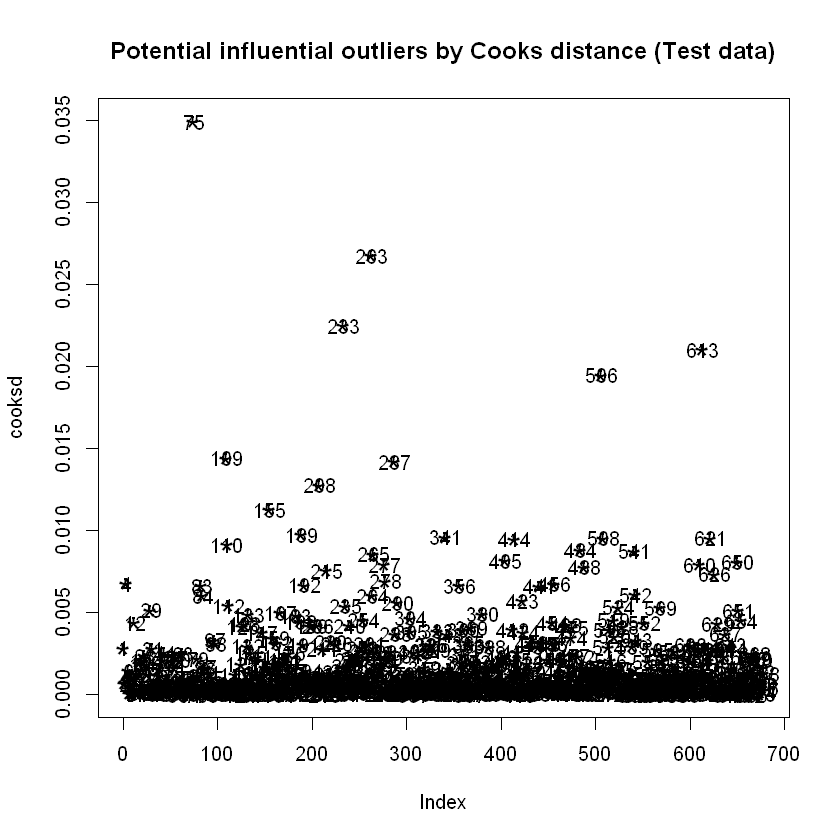

In [67]:
#code sourced from https://www.r-bloggers.com/outlier-detection-and-treatment-with-r/
mod <- glm(quality ~ alcden+volatile.acidity+sulfconc+residual.sugar+fixed.acidity+pH, 
                      data=test, family=binomial(link = 'logit'))
cooksd <- cooks.distance(mod)

plot(cooksd, pch="*", cex=2, main="Potential influential outliers by Cooks distance (Test data)")  # plot cook's distance
text(x=1:length(cooksd)+1, y=cooksd)  # add labels

When compared to our initial cooks distance plot, which only was showing cooks distances up to approximately 0.017, there are approximately 5 values above this in the test data.  This could explain why our model prediction rates went down.

All three models show very similar performance measures, with accuracy being highest with the lasso model, fmeasure being highest on the ridge model and with AUC being highest on the ridge model.

Stepwise regression chose 6 variables for the final model, but was only showing a good cross-validation after feature-engingeering had been performed based on information about wine chemistry.

Ridge regression chose all 8 engineered features for the final model.

Lasso regression chose 7 features for the final model.

Based on simplicity and ease of only having to collect 6 variables for as accurate predictions, I would choose Stepwise regression as the best model to use for prediction.

## Summary

 In this notebook we:
 1. Performed some research into wine chemistry using the resources listed below.
 2. Did a small data exploration: checked data structures and looked at the summary statistics and distributions
 3. Detected outliers using cooks distance and general logistic models
 4. Performed feature engineering by turning free.sulfur.dioxide and total.sulfur.dioxide into a concentrated volume based on research about wine chemicals.
 5. Performed feature engineering by combining alcohol and density as a correlated value.
 6. Cross validated a stepwise regression method of choosing data features to settle on a final stepwise regression model containing 6 data features.  Cross validated this again on the training set.
 7. Tuned (cross-validated) a lambda value for Ridge regression and built a ridge regression model that was cross validated against the training set.  This model used 8 features.
 8. Tuned (cross-validated) a lambda value for Lasso regression and built a lasso regression model that was cross validated against the training set.  This model used 7 features.
 9. Tested the final three models against the test set provided.
 10. Chose the stepwise regression as the "best" model as it only uses 6 variables for the same accuracy in predictions as the other two models.
 
Improvements could be made to this model to explain the variance.  The main data point missing from this data set is the colour of the wines (red, white, rose).  I believe that the variance in the alcohol variable is not properly explained by any other variable in the set, and that if the data was separated by colour of wine, or grape used, then the results would be different and the models more accurate!

Thanks for reading, and well done for reaching the bottom of this massive notebook!

## References

__Wine References__
> Acids in wine. (2017, August 31). Retrieved September 02, 2017, from https://en.wikipedia.org/wiki/Acids_in_wine

> The Australian Wine Research Institute. (n.d.). Retrieved September 03, 2017, from https://www.awri.com.au/ 

> University of California (2004). Waterhouse Lab - What's in Wine. Retrieved September 02, 2017, from http://waterhouse.ucdavis.edu/whats-in-wine/

__R references__
> https://www.r-bloggers.com/a-small-introduction-to-the-rocr-package/

> https://www.r-bloggers.com/outlier-detection-and-treatment-with-r/

> Friedman, Hastie and Tibshirani (2010).  Regularization Paths for Generalized Linear Models via Coordinate Descent.  Journal of Statistical Software.  Volume 33, Issue 1.